In [8]:
# import block
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline
from astropy.visualization import hist
from ccdproc import ImageFileCollection
import ccdproc as ccdp
from astropy.modeling import fitting
from astropy.modeling.models import Polynomial1D,Chebyshev1D,Legendre1D,Hermite1D
from astropy.nddata import CCDData
from datetime import datetime
from astropy.stats import sigma_clip

In [9]:
#total image is 2048x2200
#the section we want is 2048x2048
#overscan region on left and right of the trim section
#sky flat, seeing the overscan region is obvious due to lack of data
#bias frames, can't see overscan region, bright streak down the middle
#darks, completely dark

In [10]:
#2

data_dir = '/Users/azeem/Downloads/Imaging/' #directory of raw images
biasnum = np.arange(93,112) #bias frames from .log file

# list comprehension
names = ['a'+str(num).zfill(3)+'.fits' for num in biasnum]
print(names) #names of bias files

hdu = fits.open(data_dir+names[0]) #open .fits file
hdr = hdu[0].header
print(hdr)

['a093.fits', 'a094.fits', 'a095.fits', 'a096.fits', 'a097.fits', 'a098.fits', 'a099.fits', 'a100.fits', 'a101.fits', 'a102.fits', 'a103.fits', 'a104.fits', 'a105.fits', 'a106.fits', 'a107.fits', 'a108.fits', 'a109.fits', 'a110.fits', 'a111.fits']
SIMPLE  =                    T / Fits standard                                  BITPIX  =                   16 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 2200 / Axis length                                    NAXIS2  =                 2048 / Axis length                                    EXTEND  =                    F / File may contain extensions                    BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     BZERO   =           3.276800E4 /                                                ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2009-09-15T15:56:40' 

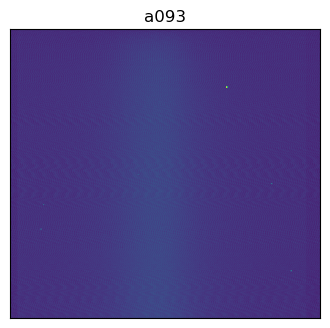

In [11]:
#3
img = hdu[0].data #image data from first bias frame image
min_level = 650 #min brightness
max_level = 750 #max brightness
fig = plt.subplots(1,1,figsize=(4,4))
plt.imshow(img, vmin=min_level, vmax=max_level)
plt.xticks([])
plt.yticks([])
plt.title('a093')
plt.grid(False)
plt.show()

In [12]:
#To plot columns of the data, choose a section of columns that spans all rows
col = img[:,1000:1500] #1001st column
print(len(col))
print(col)

2048
[[657 664 665 ... 660 658 662]
 [663 655 660 ... 662 661 631]
 [663 663 663 ... 659 667 662]
 ...
 [674 671 676 ... 668 667 660]
 [669 670 672 ... 668 660 665]
 [673 671 673 ... 660 664 662]]


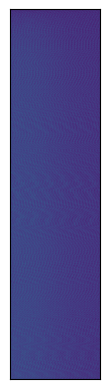

In [13]:
#for the plot of columns
plt.imshow(col, vmin=min_level, vmax=max_level)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
#A plot of the columns 1000-1499

In [14]:
#To plot lines of the data, choose a section of lines that spans all columns
row = img[1000:1500,:] #1001st column
print(len(row))
print(row)

500
[[654 661 635 ... 659 663 672]
 [666 658 631 ... 657 646 661]
 [660 666 639 ... 655 664 660]
 ...
 [643 661 652 ... 678 664 663]
 [667 659 635 ... 660 658 648]
 [659 666 636 ... 660 662 660]]


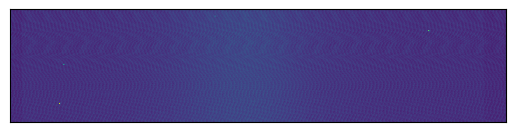

In [15]:
#for the plot of columns
plt.imshow(row, vmin=min_level, vmax=max_level)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
#A plot of the row 1000-1499

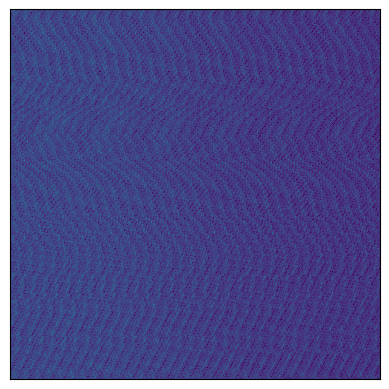

668.696424
217.7901128334342


In [16]:
#to get a region of the center of the chip
center = img[1000:1500, 1000:1500]
plt.imshow(center, vmin=min_level, vmax=max_level)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

#to compute the mean
mean = np.mean(center)
print(mean)

#root mean square of the region
rms = np.sqrt(np.mean(center**2))
print(rms)

In [17]:
#5
data_dir = '/Users/azeem/Downloads/Imaging/' #directory of raw images
biasnum = np.arange(93,112) #bias frames from .log file

# list comprehension
biasnames = [data_dir+'a'+str(num).zfill(3)+'.fits' for num in biasnum]
print(biasnames)

biashdu = [fits.open(file) for  file in biasnames] #open all bias files
print(hdr)

biasdata = [item[0].data for item in biashdu] #the raw data from each bias frame
biasmean = [np.mean(frame) for frame in biasdata] #the mean value of each frame

['/Users/azeem/Downloads/Imaging/a093.fits', '/Users/azeem/Downloads/Imaging/a094.fits', '/Users/azeem/Downloads/Imaging/a095.fits', '/Users/azeem/Downloads/Imaging/a096.fits', '/Users/azeem/Downloads/Imaging/a097.fits', '/Users/azeem/Downloads/Imaging/a098.fits', '/Users/azeem/Downloads/Imaging/a099.fits', '/Users/azeem/Downloads/Imaging/a100.fits', '/Users/azeem/Downloads/Imaging/a101.fits', '/Users/azeem/Downloads/Imaging/a102.fits', '/Users/azeem/Downloads/Imaging/a103.fits', '/Users/azeem/Downloads/Imaging/a104.fits', '/Users/azeem/Downloads/Imaging/a105.fits', '/Users/azeem/Downloads/Imaging/a106.fits', '/Users/azeem/Downloads/Imaging/a107.fits', '/Users/azeem/Downloads/Imaging/a108.fits', '/Users/azeem/Downloads/Imaging/a109.fits', '/Users/azeem/Downloads/Imaging/a110.fits', '/Users/azeem/Downloads/Imaging/a111.fits']
SIMPLE  =                    T / Fits standard                                  BITPIX  =                   16 / Bits per pixel                                 NAX

Text(0.5, 0, 'bias frame')

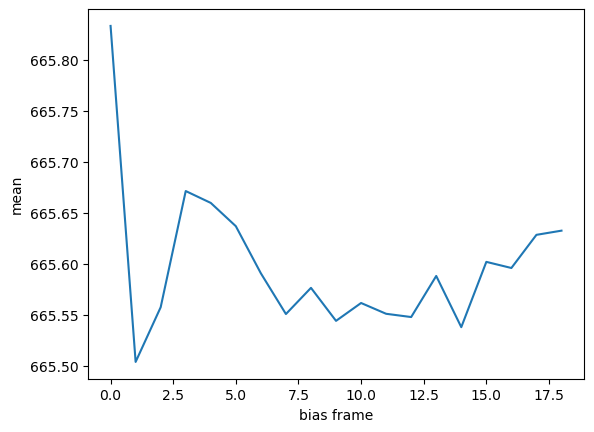

In [18]:
plt.plot(biasmean)
plt.ylabel('mean')
plt.xlabel("bias frame")
#We do not see much variation over the night, if any

['/Users/azeem/Downloads/Imaging/a005.fits', '/Users/azeem/Downloads/Imaging/a006.fits', '/Users/azeem/Downloads/Imaging/a007.fits', '/Users/azeem/Downloads/Imaging/a008.fits', '/Users/azeem/Downloads/Imaging/a009.fits', '/Users/azeem/Downloads/Imaging/a010.fits', '/Users/azeem/Downloads/Imaging/a011.fits', '/Users/azeem/Downloads/Imaging/a012.fits', '/Users/azeem/Downloads/Imaging/a013.fits', '/Users/azeem/Downloads/Imaging/a014.fits', '/Users/azeem/Downloads/Imaging/a015.fits', '/Users/azeem/Downloads/Imaging/a016.fits', '/Users/azeem/Downloads/Imaging/a017.fits', '/Users/azeem/Downloads/Imaging/a018.fits', '/Users/azeem/Downloads/Imaging/a019.fits', '/Users/azeem/Downloads/Imaging/a020.fits', '/Users/azeem/Downloads/Imaging/a021.fits', '/Users/azeem/Downloads/Imaging/a022.fits', '/Users/azeem/Downloads/Imaging/a023.fits', '/Users/azeem/Downloads/Imaging/a024.fits', '/Users/azeem/Downloads/Imaging/a025.fits', '/Users/azeem/Downloads/Imaging/a026.fits', '/Users/azeem/Downloads/Imaging

Text(0.5, 0, 'flat frame')

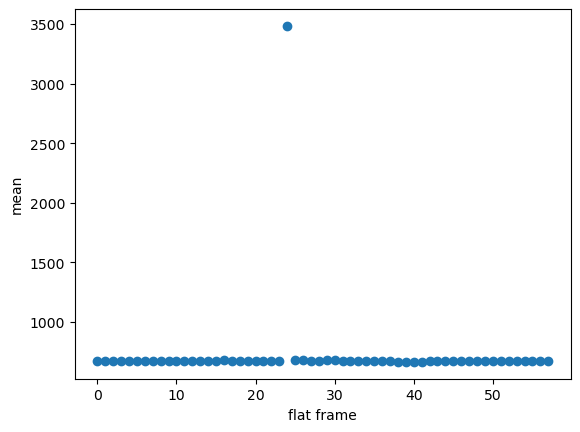

In [19]:
flatnum = np.arange(5,63) #flat frames from .log file

# list comprehension
flatsnames = [data_dir+'a'+str(num).zfill(3)+'.fits' for num in flatnum]
print(flatsnames)

flatshdu = [fits.open(file) for  file in flatsnames] #open all flat files
flatsdata = [item[0].data for item in flatshdu] #the raw data from each flat frame

overscanR = [img[:,2102:] for img in flatsdata] #the Right overscan region
print(np.shape(overscanR))

overscanmean = [np.mean(frame) for frame in overscanR] #the mean value of the overscan region in each frame
print(overscanmean)

plt.scatter(np.arange(len(overscanmean)), overscanmean) #plot overscan mean pix values
plt.ylabel('mean')
plt.xlabel('flat frame')
#besides outlier, the overscan region doesn't vary much

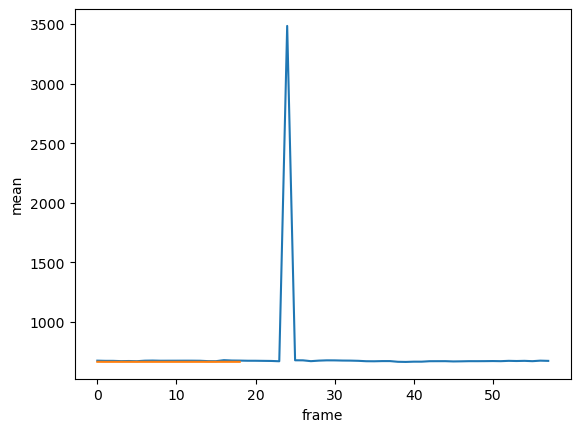

8.727630109717133
We see that for mean of the bias frames is nearly the same as the overscan region (other than the clear outlier). We can then use only the first 8 flats and compare to the 8 bias frames. We see little variation. Therefore, we can make the argument for that it would be a good to combine all of the biases to make a master bias and subtract that from all the images, because it will be basically the same as the overscan regions of each image


In [20]:
#plot Overscan region AND bias

plt.plot(np.arange(len(overscanmean)), overscanmean)
plt.plot(np.arange(len(biasmean)), biasmean)
plt.ylabel('mean')
plt.xlabel('frame')
plt.show()

i=0
difflist = []
while i < len(biasmean):  #only need the 8 biasframes
    bmean = biasmean[i]
    flatmean = overscanmean[i]
    diff = flatmean-bmean   #difference between flat mean and biasmean
    difflist.append(diff)
    i += 1                 #check to make sure it only iterates 8 times
meandiff = np.mean(difflist)
print(meandiff)
print("We see that for mean of the bias frames is nearly the same as the overscan region (other than the clear outlier). We can then use only the first 8 flats and compare to the 8 bias frames. We see little variation. Therefore, we can make the argument for that it would be a good to combine all of the biases to make a master bias and subtract that from all the images, because it will be basically the same as the overscan regions of each image")

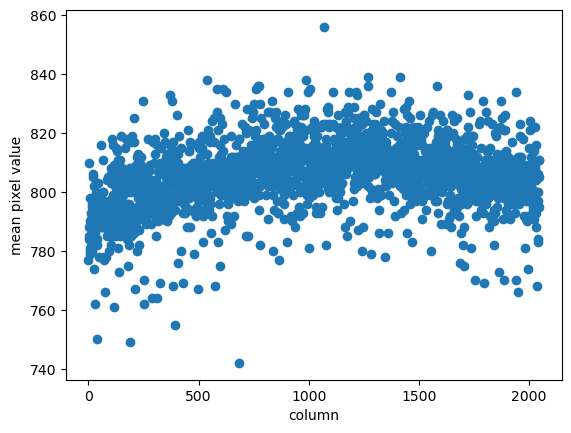

In [37]:
#6
imgflat = flatsdata[0] #data from first flat
imgflat = CCDData(imgflat, unit="adu") #convert to CCD usable type

meanrowoverscan = [np.mean(row[0]) for row in overscanR[0]] #mean values of each row in overscan region
plt.scatter(np.arange(2048), meanrowoverscan)
plt.ylabel('mean pixel value')
plt.xlabel('column')
plt.show()



Model: Chebyshev1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 8
Domain: (0.0, 2047.0)
Parameters:
            c0                c1        ...          c7                 c8        
    ----------------- ----------------- ... ------------------- ------------------
    802.7073638289006 5.179523972737581 ... -0.1878292417497748 -0.634803506228777


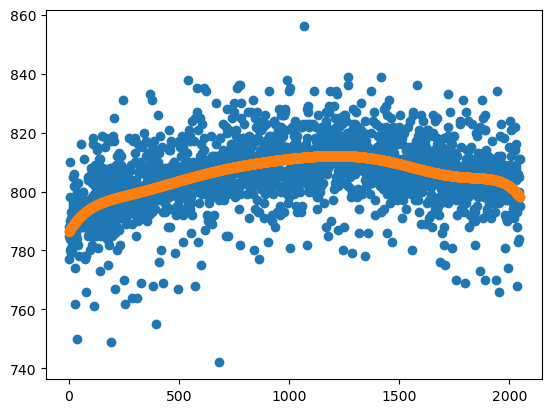

<class 'astropy.nddata.ccddata.CCDData'>


In [22]:
#if we try Chebyshev model, which uses prime number counting
model = [Chebyshev1D(num) for num in np.arange(1,9)]
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model[7],np.arange(2048), meanrowoverscan) #for the 8th degree
print(best_fit)
plt.scatter(np.arange(2048), meanrowoverscan)

plt.scatter(np.arange(2048), best_fit(np.arange(2048))) #in orange
plt.show()

subtractedflat = ccdp.subtract_overscan(imgflat, overscan=imgflat[:,2102:], model=best_fit)
trimsubflat = ccdp.trim_image(subtractedflat[:, 53:2101])
print(type(trimsubflat))


Model: Legendre1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 6
Domain: (0.0, 2047.0)
Parameters:
            c0                c1        ...         c5                 c6        
    ----------------- ----------------- ... ----------------- -------------------
    805.5721215455926 4.899130371274264 ... 1.303376906013699 -1.6745158810079752


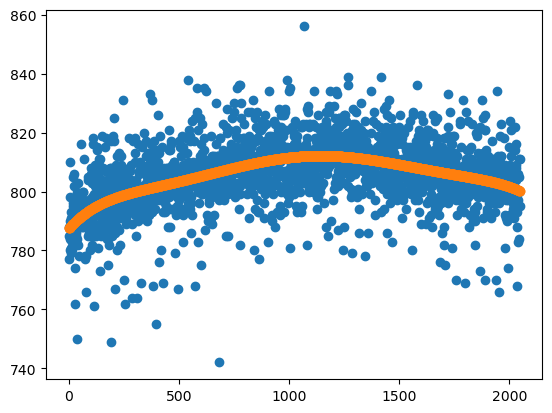

In [23]:
#if we try Legendre model, which uses orthogonal polynomials
model = [Legendre1D(num) for num in np.arange(1,9)]
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model[5],np.arange(2048), meanrowoverscan) #6th degree
print(best_fit)
plt.scatter(np.arange(2048), meanrowoverscan)

plt.scatter(np.arange(2048), best_fit(np.arange(2048)))
plt.show()

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 4
Parameters:
            c0                 c1          ...           c4         
    ----------------- -------------------- ... ---------------------
    789.7883941510482 0.037087479227517706 ... 1.231070521199895e-19


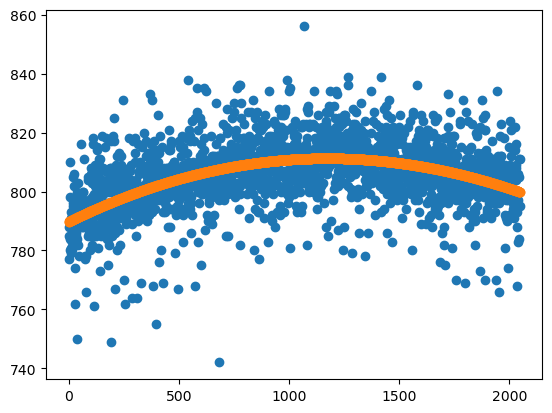

In [27]:
#if we try Hermite model, which uses orthogonal polynomials as well
model = [Hermite1D(num) for num in np.arange(1,9)]
fitter = fitting.LinearLSQFitter()
best_fitH = fitter(model[7],np.arange(2048), meanrowoverscan) #best one so far
print(best_fit)
plt.scatter(np.arange(2048), meanrowoverscan)

plt.scatter(np.arange(2048), best_fit(np.arange(2048)))
plt.show()

 [astropy.modeling.fitting]


Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 4
Parameters:
            c0                 c1          ...           c4         
    ----------------- -------------------- ... ---------------------
    789.7883941510482 0.037087479227517706 ... 1.231070521199895e-19


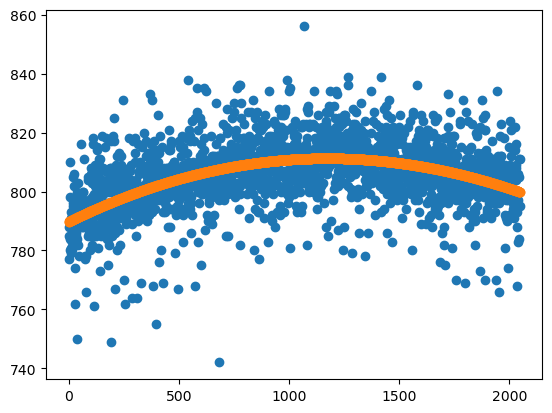

In [25]:
#if we try Polynomial, which sums the variables to exponents
model = [Polynomial1D(num) for num in np.arange(1,9)]
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model[3],np.arange(2048), meanrowoverscan)
print(best_fit)
plt.scatter(np.arange(2048), meanrowoverscan)

plt.scatter(np.arange(2048), best_fit(np.arange(2048)))
plt.show()

#judging by visual inspection, the 2nd degree order Hermite model appears to be best fit

<class 'astropy.nddata.ccddata.CCDData'>
std of flat: 2006.105811534254
std of bias subbed flat: 2004.943078624809


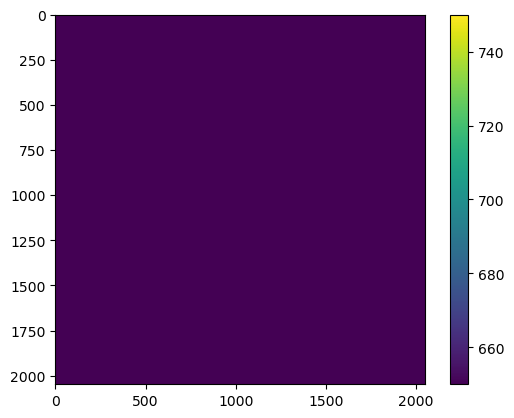

In [28]:
#7
#reduce bias frames

imgbias = CCDData([biasd for biasd in biasdata], unit="adu") #convert to proper file type

subtractedbias = [ccdp.subtract_overscan(img, overscan=img[:,2102:], model=best_fitH) for img in imgbias] #subtract overscan region in bias frames
trimsubbias = [ccdp.trim_image(img[:,53:2101]) for img in subtractedbias] #trims overscan region from bias frame
reduced_bias = trimsubbias
masterbias = ccdp.combine(reduced_bias) #combines into one master bias
print(type(masterbias))
masterbiassub = ccdp.subtract_bias(trimsubbias[0], masterbias) #subtracts master bias from the first reduced bias frame
plt.imshow(masterbias, vmin=min_level, vmax=max_level)
plt.colorbar()

##looking at how the bias mean changes over time in the plot earlier, we can say that there is little variation and it is appropiate 
#to make one master bias
#additionally, there is a pattern in each bias which is intrinstic to ALL images

#the level barely changes and the pattern does not change throughout the night

# #to estimate how much noise we will be adding
# #we look at the flat:
flatstd = np.std(trimsubflat)
print('std of flat:', flatstd )

# #now if we subtract the bias:
biassubflat = ccdp.subtract_bias(trimsubflat, masterbias)
biassubstd = np.std(biassubflat)
print('std of bias subbed flat:', biassubstd)

#We see that the standard deviation is actually smaller for the bias subtracted frame compared to JUST the overscan subtracted, meaning it is a good idea to apply to all science frames!



In [339]:
#subtract from science frames
sciencefiles1 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(64,93)] # science names of first set
sciencefiles2 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(112,140)] # science names of second set
sciencefiles3 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(142,152)] # science names of third set
sciencefiles4 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(153,164)] # science names of fourth set
sciencefiles5 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(165,182)] # science names of fifth set
sciencefiles6 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(183,193)] # science names of sixth set
sciencefiles7 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(194,221)] # science names of seventh set
sciencefiles8 = [data_dir+"a"+str(num).zfill(3)+".fits" for num in np.arange(237,247)] # science names of eighth set
sciencefiles = sciencefiles1 + sciencefiles2 + sciencefiles3 + sciencefiles4 + sciencefiles5 + sciencefiles6 + sciencefiles7 + sciencefiles8
# all science frames skipping bias frames
sciencehdu = [fits.open(file) for file in sciencefiles] # list of header objects
sciencedata = [item[0].data for item in sciencehdu] # list of data from science frames

#Now, to reduce the science data
#I'm getting a memory error when I do this step but I think it is correct
scienceccd = [CCDData(img, unit="adu") for img in sciencedata]
sciencesub = [ccdp.subtract_overscan(img, overscan=img[:, 2102:], model=best_fit) for img in scienceccd]
sciencesubtrim = [ccdp.trim_image(img[:, 53:2101]) for img in sciencesub]
sciencesubbias = ccdp.subtract_bias(sciencesubtrim, masterbias)





MemoryError: Unable to allocate 34.4 MiB for an array with shape (2048, 2200) and data type float64

In [36]:
#8
darknum = np.arange(1,16) #bias frames from .log file

# list comprehension
darksnames = [data_dir+'d'+str(num).zfill(3)+'.fits' for num in darknum]
print(darksnames)

darkshdu = [fits.open(file) for  file in darksnames] #open all bias files
darksdata = [item[0].data for item in darkshdu]


imgdark = CCDData([darkd for darkd in darksdata], unit="adu") #convert darks to proper type


subtracteddark = [ccdp.subtract_overscan(img, overscan=img[:,2102:], model=best_fit) for img in imgdark] #subtract overscan from darks
trimdarksub = [ccdp.trim_image(img[:,53:2101]) for img in subtracteddark] #trim overscan region
biassubdark = [ccdp.subtract_bias(img, masterbias) for img in trimdarksub] #subtract bias from reduced dark

['/Users/azeem/Downloads/Imaging/d001.fits', '/Users/azeem/Downloads/Imaging/d002.fits', '/Users/azeem/Downloads/Imaging/d003.fits', '/Users/azeem/Downloads/Imaging/d004.fits', '/Users/azeem/Downloads/Imaging/d005.fits', '/Users/azeem/Downloads/Imaging/d006.fits', '/Users/azeem/Downloads/Imaging/d007.fits', '/Users/azeem/Downloads/Imaging/d008.fits', '/Users/azeem/Downloads/Imaging/d009.fits', '/Users/azeem/Downloads/Imaging/d010.fits', '/Users/azeem/Downloads/Imaging/d011.fits', '/Users/azeem/Downloads/Imaging/d012.fits', '/Users/azeem/Downloads/Imaging/d013.fits', '/Users/azeem/Downloads/Imaging/d014.fits', '/Users/azeem/Downloads/Imaging/d015.fits']


 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]
 [astropy.modeling.fitting]


In [35]:
#calculating the dark current
#we choose one dark frame
subtracteddark1 = ccdp.subtract_overscan(imgdark[0], overscan=imgdark[0][:,2102:], model=best_fitH)
trimdarksub1 = ccdp.trim_image(subtracteddark1[:,53:2101])
biassubdark1 = ccdp.subtract_bias(trimdarksub1, masterbias)

darkhdr = [str(hdu[0].header["EXPTIME"])+" sec" for hdu in darkshdu] #grabs exposure times from Header
time = np.asarray([hdu[0].header["EXPTIME"] for hdu in darkshdu]) #puts exposure times into array
print(time)
#now we take the mean of the dark, multiply by the gain, and divide by exposure time
darkmean = np.mean(biassubdark1)
rate = darkmean/time
rate = rate*2.5
print(rate)
#We see that the range of dark current is ~0.0001 to 0.1, depending on the exposure time

[  2   2   2   2   2   5   5   5   5   5 300 300 300 300 300]
[0.14859252566348988 0.14859252566348988 0.14859252566348988
 0.14859252566348988 0.14859252566348988 0.05943701026539594
 0.05943701026539594 0.05943701026539594 0.05943701026539594
 0.05943701026539594 0.000990616837756599 0.000990616837756599
 0.000990616837756599 0.000990616837756599 0.000990616837756599]


In [ ]:
masterdarkavg = ccdp.combine(biassubdark, method='average') #straight average of all dark frames
masterdarkmedian = ccdp.combine(biassubdark, method='median') #straight median of all dark frames
masterdarkavg3sig = ccdp.combine(biassubdark, method='average', sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3) #average where outlier pixels are thrown out if 3sig away from mean
masterdarkmedian3sig = ccdp.combine(biassubdark, method='median', sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3) #median where outlier pixels are thrown out if 3sig away from mean

#get the rms of each
rmsmasterdarkavg = np.sqrt(np.mean(np.asarray(masterdarkavg)**2))
rmsmasterdarkmedian = np.sqrt(np.mean(np.asarray(masterdarkmedian)**2))
rmsmasterdarkavg3sig = np.sqrt(np.mean(np.asarray(masterdarkavg3sig)**2))
rmsmasterdarkmedian3sig = np.sqrt(np.mean(np.asarray(masterdarkmedian3sig)**2))

print(rmsmasterdarkavg)
print(rmsmasterdarkmedian)
print(rmsmasterdarkavg3sig)
print(rmsmasterdarkmedian3sig)

#best combination procedure is masterdarkavg3sig

#comparing master dark to master bias
meanmasterdark = np.mean(np.asarray(masterdarkavg3sig))
meanmasterbias = np.mean(np.asarray(masterbias))
diff = meanmasterbias - meanmasterdark
print("The difference between the mean of the master bias and the dark is", diff)

#dark current to noise ratio
scale = meanmasterdark/rmsmasterdarkavg3sig
print("the dark current is", s, "times larger than the noise in the master dark")
